<a href="https://colab.research.google.com/github/Tainaquz/Desafios-Dio.me-Bootcamp-BairesDevp-Machine-Learning-Bai/blob/main/desafio_dio_sistema_de_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

pasta = "/content/drive/MyDrive/Bootcamp Bairesdev/treinamento"  # Substitua pelo caminho correto

# Parâmetros
img_size = 160
images = []
labels = []
subpastas = [f for f in os.listdir(pasta) if os.path.isdir(os.path.join(pasta, f))]
for subpasta in subpastas:
    caminho_subpastas = os.path.join(pasta, subpasta)
    for file_name in os.listdir(caminho_subpastas):
        if file_name.endswith(".jpg"):
            labels.append(subpasta)
            img_path = os.path.join(caminho_subpastas, file_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
images = np.array(images) / 255.0
labels = np.array(labels)
unique_labels = sorted(set(labels))
print(f"Rótulos únicos encontrados: {unique_labels}")

label_to_index = {name: idx for idx, name in enumerate(unique_labels)}
print(f"Mapeamento de rótulos para índices: {label_to_index}")

indices = np.array([label_to_index[label] for label in labels])
cada_rotulo = to_categorical(indices, num_classes=len(unique_labels))
X_train, X_val, y_train, y_val = train_test_split(images, cada_rotulo, test_size=0.2, random_state=42)



Rótulos únicos encontrados: ['barra de proteina', 'chocolate', 'creatina', 'wheypotein']
Mapeamento de rótulos para índices: {'barra de proteina': 0, 'chocolate': 1, 'creatina': 2, 'wheypotein': 3}


Treinamento concluído!


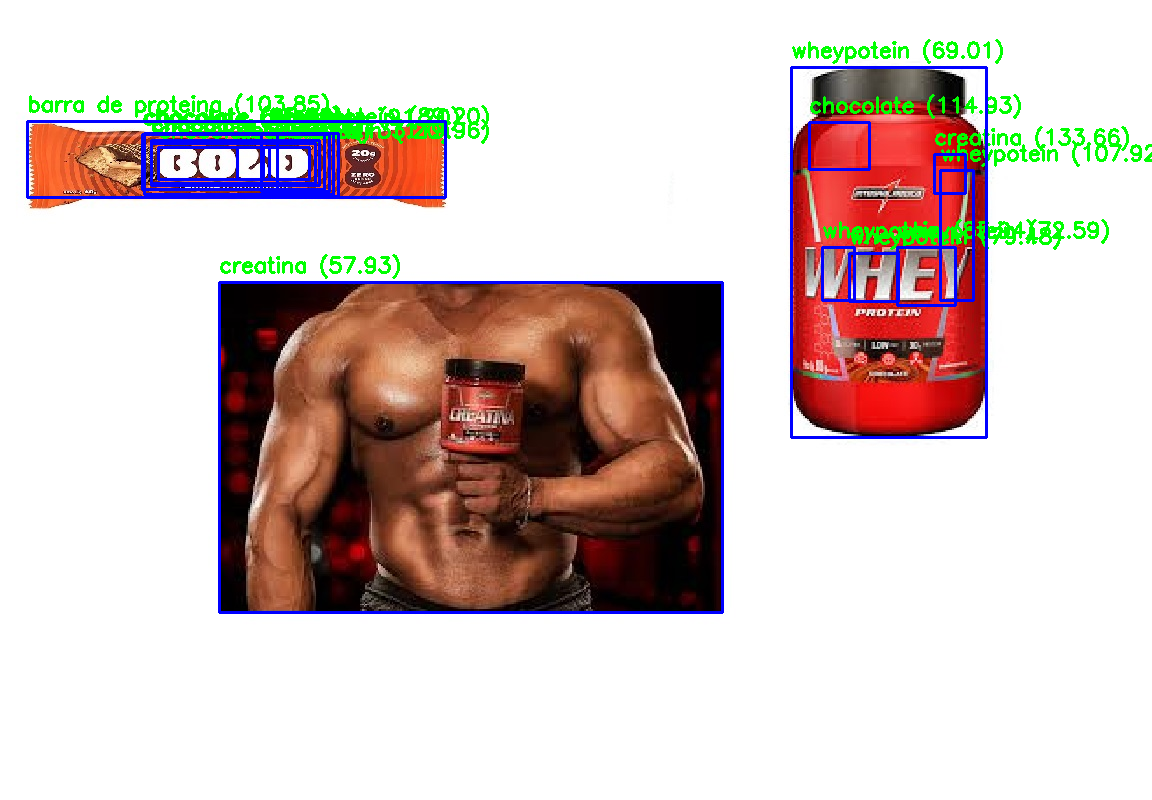

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def reconhecimento_objetos(pasta):
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    objetos_gray = []
    labels = []
    label_map = {}
    label = 0
    for objeto in os.listdir(pasta):
        caminho_objeto = os.path.join(pasta, objeto)
        if os.path.isdir(caminho_objeto):
            for image_name in os.listdir(caminho_objeto):
                if image_name.endswith('.jpg'):
                    image_path = os.path.join(caminho_objeto, image_name)
                    image = cv2.imread(image_path)
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    objetos_gray.append(gray)
                    labels.append(label)
            label_map[label] = objeto
            label += 1
    recognizer.train(objetos_gray, np.array(labels))
    print("Treinamento concluído!")
    return recognizer, label_map

def reconhecer_objetos(image_path, recognizer, label_map):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 30 and h > 30:
            forma = gray[y:y+h, x:x+w]
            reformatando = cv2.resize(forma, (100, 100))
            label, confidence = recognizer.predict(reformatando)
            name = label_map.get(label, "Desconhecido")
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(image, f"{name} ({confidence:.2f})", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Exibe a imagem
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Caminho para as imagens de treino
pasta = "/content/drive/MyDrive/Bootcamp Bairesdev/treinamento"

# Treina o modelo de reconhecimento
recognizer, label_map = reconhecimento_objetos(pasta)

# Caminho para a imagem de teste
image_teste = "/content/drive/MyDrive/Bootcamp Bairesdev/2.jpg"

# Realiza o reconhecimento
reconhecer_objetos(image_teste, recognizer, label_map)


